<div class="alert alert-block alert-info">
SECTION 1: extract player for making the analysis
</div>

In [1]:
# Use static library "players"
from nba_api.stats.static import players

# Get all nba players
nba_players = players.get_players() # get_players returns a list of dictionaries, each representing a player.

# Iterate over nba player to find desidered player
player = [player for player in nba_players if player['full_name'] == 'James Harden'][0]
player


{'id': 201935,
 'full_name': 'James Harden',
 'first_name': 'James',
 'last_name': 'Harden',
 'is_active': True}

<div class="alert alert-block alert-info">
SECTION 2: player free throws stats (career)
</div>

In [2]:
# Use "playercareerstats" endpoint
from nba_api.stats.endpoints import playercareerstats

# Get player's career stats
player_carr_stats = playercareerstats.PlayerCareerStats(player_id=player["id"])
player_carr_stats = player_carr_stats.get_data_frames()[0]
player_carr_stats

# Get free throw made and attempted by season
cols = ['SEASON_ID', 'FTM', 'FTA', "FT_PCT"]
player_ft_stats = (player_carr_stats[cols])
player_ft_stats

# Drop 2020-21 season from dataframe
index_to_eliminate = player_ft_stats[(player_ft_stats['SEASON_ID']=='2020-21')].index
index_to_eliminate
player_ft_stats.drop(index_to_eliminate, inplace=True)


C:\Users\ricca\anaconda3\envs\Machine_learning\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


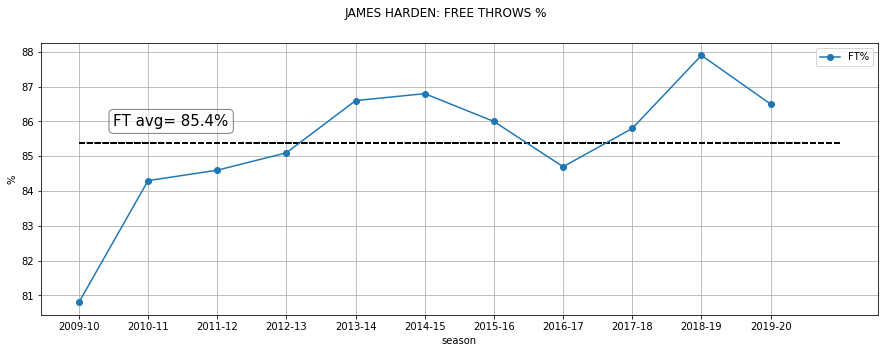

In [3]:
# import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# plot free throws percentage
fig, ax1 = plt.subplots(figsize=(15,5))
fig.suptitle(str(player['full_name']).upper() + ": " +'FREE THROWS %')
ax1.plot(player_ft_stats['SEASON_ID'], player_ft_stats['FT_PCT'] * 100, marker='o', label='FT%')

# plot free throw average
player_ft_avg = np.array([(player_ft_stats['FT_PCT'].mean() * 100) for i in range(len(player_ft_stats))])
ax1.hlines(y = player_ft_avg, xmin=0, xmax=len(player_ft_stats['SEASON_ID']), linestyle='dashed')

# add text
player_ft_avg_text = str("FT avg= " + str(round(player_ft_avg[0], 1)) + "%")                       
ax1.text(0.5, player_ft_avg[0] + 0.5, player_ft_avg_text, size=15, bbox=dict(boxstyle="round", facecolor='white', alpha=0.5))

# set plot axes
ax1.set_ylabel('%')
ax1.set_xlabel('season')
ax1.grid()
ax1.legend()


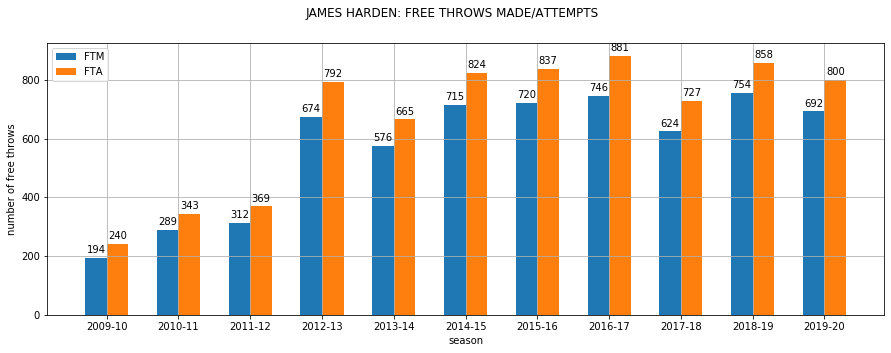

In [4]:
# Plot free throw made and attempts
x = np.arange(len(player_ft_stats))  # the label locations
width = 0.30  # the width of the bars
fig, ax1 = plt.subplots(figsize=(15,5))
fig.suptitle(str(player['full_name']).upper() + ": " + 'FREE THROWS MADE/ATTEMPTS')
rects1 = ax1.bar(x - width/2, player_ft_stats['FTM'], width, label='FTM')
rects2 = ax1.bar(x + width/2, player_ft_stats['FTA'], width, label='FTA')

# Set plot axes
ax1.set_ylabel('number of free throws')
ax1.set_xlabel('season')
ax1.set_xticks(x)
ax1.set_xticklabels(player_ft_stats['SEASON_ID'])
ax1.grid()
ax1.legend()

# Function to attach a text label above each bar, displaying its height
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax1.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the function        
autolabel(rects1)
autolabel(rects2)


<div class="alert alert-block alert-info">
SECTION 3: player free throws stats (last 10 games)
</div>

In [5]:
# Use "playergamelog" endpoint
from nba_api.stats.endpoints import playergamelog

# Get player all stats from last 10 games
player_info_last10games = playergamelog.PlayerGameLog(player_id=player["id"])
player_info_last10games = player_info_last10games.get_data_frames()[0]

# Get free throws stats from last 10 games
cols = ["GAME_DATE", "MATCHUP", "PTS", "FTM", "FTA", "FT_PCT"]
player_info_last10games = (player_info_last10games[cols])
player_info_last10games

# Add columns to dataframe
player_info_last10games["FT_PTS"] = player_info_last10games["FTM"]/player_info_last10games["PTS"]
player_info_last10games["COMPLETE_MATCH"] = player_info_last10games['GAME_DATE'].astype(str) + " - " + player_info_last10games['MATCHUP'].astype(str)

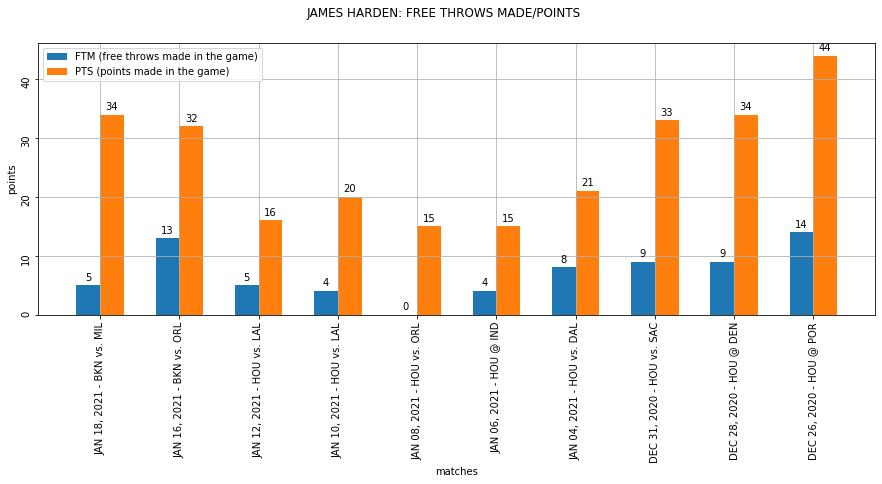

In [6]:
# Plot free throw made and total points made in single game
x = np.arange(len(player_info_last10games))  # the label locations
width = 0.30  # the width of the bars
fig, ax1 = plt.subplots(figsize=(15,5))
fig.suptitle(str(player['full_name']).upper() + ": " + 'FREE THROWS MADE/POINTS')
rects1 = ax1.bar(x - (width/2), player_info_last10games['FTM'], width, label='FTM (free throws made in the game)')
rects2 = ax1.bar(x + (width/2), player_info_last10games['PTS'], width, label='PTS (points made in the game)')

# Set plot axes
ax1.set_ylabel('points')
ax1.set_xlabel('matches')
ax1.set_xticks(x)
ax1.tick_params(rotation=90)
ax1.set_xticklabels(player_info_last10games['COMPLETE_MATCH'])
ax1.grid()
ax1.legend()

# Function to attach a text label above each bar, displaying its height
def autolabel(rects):
    #Attach a text label above each bar in *rects*, displaying its height
    for rect in rects:
        height = rect.get_height()
        ax1.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the function
autolabel(rects1)
autolabel(rects2)


In [7]:
# Influence of free throws on total scored points (last 10 games analysis)
pts_sum = player_info_last10games["PTS"].sum()
ftm_sum = player_info_last10games["FTM"].sum()
ftm_on_pts = round(player_info_last10games["FTM"].sum() / player_info_last10games["PTS"].sum(), 2)
print(" In the last 10 games {} scored {} points, of which {} came from made free throws. The influence of free throws on total made points is {} %."
      .format(player['full_name'], pts_sum, ftm_sum, ftm_on_pts*100))


 In the last 10 games James Harden scored 264 points, of which 71 came from made free throws. The influence of free throws on total made points is 27.0 %.


<div class="alert alert-block alert-info">
SECTION 4: Influence of free throws on made points
</div>

In [8]:
# Import pandas package
import pandas as pd

# Use "playergamelogs" endpoint
from nba_api.stats.endpoints import playergamelog

# Get data from all seasons 
seasons = [2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009]
pts_sum = []
ftm_sum = []
for i in seasons:
    player_info_all_games = playergamelog.PlayerGameLog(player_id=player["id"], season=i)
    player_info_all_games = player_info_all_games.get_data_frames()[0]
    pts_sum.append(player_info_all_games["PTS"].sum())
    ftm_sum.append(player_info_all_games["FTM"].sum())
pts_sum = np.array(pts_sum, dtype=int)
ftm_sum = np.array(ftm_sum, dtype=int) 
seasons = np.array(seasons, dtype=str)
ftm_on_pts = [i / j for i, j in zip(ftm_sum, pts_sum)]
ftm_on_pts = np.array(ftm_on_pts, dtype=float)*100
ftm_on_pts = np.around(ftm_on_pts, 1)

# Conversion to pandas dataframe
matrix = np.array([seasons, pts_sum, ftm_sum, ftm_on_pts]).T
free_throws_df = pd.DataFrame(matrix, columns = ['SEASON', 'PTS','FTM','FTM_PTS_%'])
free_throws_df = free_throws_df.sort_values(by=['SEASON'])
free_throws_df.reset_index(inplace=True)
free_throws_df.astype(float)
free_throws_df["SEASON"] = free_throws_df["SEASON"].astype(str)
free_throws_df["PTS"] = free_throws_df["PTS"].astype(int)
free_throws_df["FTM"] = free_throws_df["FTM"].astype(int)
free_throws_df["FTM_PTS_%"] = free_throws_df["FTM_PTS_%"].astype(float)


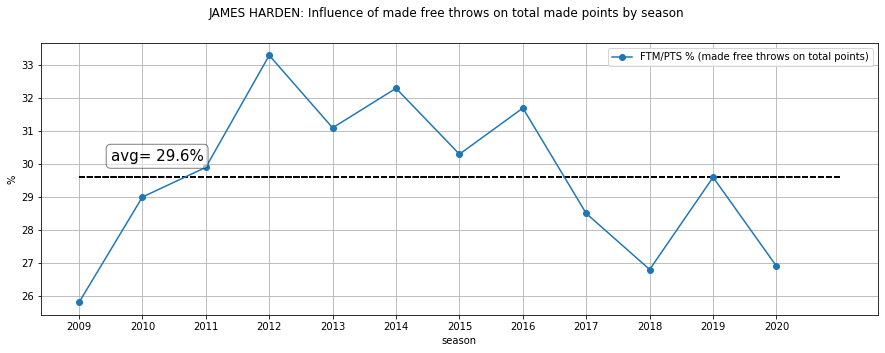

In [20]:
# Plot influence of made free throws on total pints by season
fig, ax1 = plt.subplots(figsize=(15,5))
fig.suptitle(str(player['full_name']).upper() + ": " +'Influence of made free throws on total made points by season')
ax1.plot(free_throws_df['SEASON'], free_throws_df['FTM_PTS_%'], marker='o', label='FTM/PTS % (made free throws on total points)')

# Plot average influence of free throws on total pints by season
player_ft_avg = np.array([(free_throws_df['FTM_PTS_%'].mean()) for i in range(len(free_throws_df))])
ax1.hlines(y = player_ft_avg, xmin=0, xmax=len(free_throws_df['FTM_PTS_%']), linestyle='dashed')

# Add text
player_ft_avg_text = str("avg= " + str(round(player_ft_avg[0], 1)) + "%")                       
ax1.text(0.5, player_ft_avg[0] + 0.5, player_ft_avg_text, size=15, bbox=dict(boxstyle="round", facecolor='white', alpha=0.5))

# Set plot axes
ax1.set_ylabel('%')
ax1.set_xlabel('season')
ax1.grid()
ax1.legend()
